## Module 2 Project
### Physics/Biology 212, Spring 2020

Laird Stewart <br>
Group members, if any: NA <br>
Date: 02/23/20

### Introduction
In this problem I solve the problem of a pendulum with resistance and an applied force. The pendulum will be released from a ceartain angle and then swing back and forth depending on the air (or possibly water) resistance, and the applied force's magnitude and period.

### Problem Analysis: 
In this problem the pendulum can either exist in a chaotic or periododic state depending on its starting conditions. It is possible that even though we start the pendulum at less than one degree apart they will follow vastly different trajectories in the long run. It is also possible that they will stay in sync forever. These are the cases of it being a chaotic and periodic system respectively

### Model Development: 
In order to solve this problem we must have an equation that can relate these things: 1. the angle, 2. the angular velocity, 3. the resisting force, and 4. the applied force. If we begin with newton's second law of motion we can derive this equation: 
$$ \sum{F} = m*a$$
The first force is gravity: $-mg\sin{Θ}$

The next is the damping force is propotional to velocity (like any other air or water resistance) so we will make this force a factor γ of the velocity: $-γv$

The third is the applied force which we will call of a magnitue A and it will act periodically so we will multiply it by sin and some period factor omegea: $A\sin{Ω*t}$

Putting all this together: 
$$m*a = -mg\sin{Θ} -γv + A\sin{(Ω*t)}$$

Now lets try to simplify 'a' further. We know that arc length is equal to theta*length: $s=Θ*l$

We also know that the derivative of arc length is velocity: $v=\frac{ds}{dt}$

So we can say: $\frac{ds}{dt}=l*\frac{dΘ}{dt}$

And acceleration is the second derivative of arc length: $a=\frac{d^2s}{dt^2}$

So we finally have an expression for velocity: 
$$a=l*\frac{d^2Θ}{dt^2}$$

Plugging this into the previous equation gives: 
$$m*l*\frac{d^2Θ}{dt^2}=-mg\sin{Θ} -γv + A\sin{(Ω*t)}$$

Now we kow the second derivative of Θ, and earlier we found the first derivative of Θ. Therefore we can set up a system of differential equations and use the methods discussed in class to solve them. 

### Code Analysis
My code consists of 4 pieces. 

#1 is Runge-Kutta algoritm for solving the differential equation. We wrote this in class and it takes as a paramater the derivative of the equation to integrate and the time steps requested and finds each point of the function for each given time step using the slope at each point of the function. 

#2 is my own function called 'pendulum'. It is essentially the two differential equations of my pendulum that I will pass into the Runge-Kutta algorithm to solve. 

#3 is a helper method that I wrote to help plot a line graph in two dimensions because this is something I will repeat alot. 

#4 is the actual initiation of all my variables and then plotting them for differnet cases including: periodic 2D and 3D and chaotic 2D and 3D, as well as all of my test cases to make sure my code was running properly. 


#### Importing everything I will need

In [2]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from matplotlib import rc
#help(odeint)

#### Runge-Kutta Differential Equation Solver. I will compare the accuracy of this to pythons built in solver. 

In [7]:
def RK2SystemArg(xPrime, x0, t, args=()):
    """
    Solves a system of ODEs using the Runge-Kutta second order (RK2) method. 
    Allows passing arguments to the function being integrated.

    Usage:
        x = RK2SystemArg(xPrime, x0, t, args=()):
    
        
        xPrime -- the right hand side of the equation dx/dt = f, which must be integrated; should return 
            a 1d numpy array of derivatives 
        x0 -- intitial condition for x; should be a 1-d numpy array of the same dimensions as the 
            return value of xPrime()
        t -- time points, at which the value of the solution is needed, should be a 1-d numpy array
        args=() -- tuple of arguments to be passes to the xPrime function 
        
        x -- 2-d numpy array of values of the solution vector at every requested time point
        
    The function does not check for whether the dimensionality of x0 and the return argument of xPrime()
    match, and the function will fail if they don't.
    """
    
    x  = np.zeros((t.size, x0.size))  # initiatize the array of results at requested time points
    dt = np.diff(t)                   # time steps
    x[0,:] = x0                       # set the initial conditions

    for i in range(1, t.size):        # Loop over all time steps
        der = xPrime(x[i-1,:], t[i-1], *args)        # current derivative
        pred = x[i-1,:] + dt[i-1] * der              # predicted variable value
        pred_der = xPrime(pred, t[i], *args)         # predicted future derivative
        x[i,:] = x[i-1,:]+0.5*(der+pred_der)*dt[i-1] # corrected variable value

    return x

#### My method to find derrivatives of the angle and angular velocity of the pendulum with respect to time, given their current values and pendulum constants

In [8]:
def pendulum(thetaW, t, l, gprime, a, omega, g):
    if(l == 0): 
        raise Exception("length can't be zero")
    
    """
    given current values of theta and w(angular velocity) return their derivatives with respect to t. 
    
    thetaW: array holding current theta in first element, and current w in second element [0,1]
    length: length of the pendulum in meters
    gammaPrime: gamma/ml, where m is mass, gamma is the dampening constant
    a: A/(m*l^2), where A is the force applied constant 
    omega: horizontal time shift of periodic applied force sin function
    t: time 
    g: gravity
    """
    
    dTheta = thetaW[1]
    dw = -(g/l)*np.sin(thetaW[0]) - gprime*thetaW[1] + a*np.sin(omega*t)
    
    return np.array((dTheta,dw))

#### Helper function to plot in two dimesions 

In [9]:
def plot(x1, y1, label1, x2, y2, label2, xaxis, yaxis, title): 
    """
    plot(x1, y1, label1, x2, y2, label2, xaxis, yaxis, title)
    x1, y1 - first set of data
    label1 - label for first set of data
    --> same for x2,y2,label2
    xaxis, yaxis - x and y axis labels
    """
    
    fig, ax = plt.subplots(figsize=(3, 2), dpi= 150, facecolor='w', edgecolor='k')
    plt.plot(x1, y1,label=label1)
    plt.plot(x2, y2,label=label2)
    plt.legend()
    plt.title(title)
    plt.xlabel(xaxis)
    plt.ylabel(yaxis)
    plt.show()

## Verifying the Solver

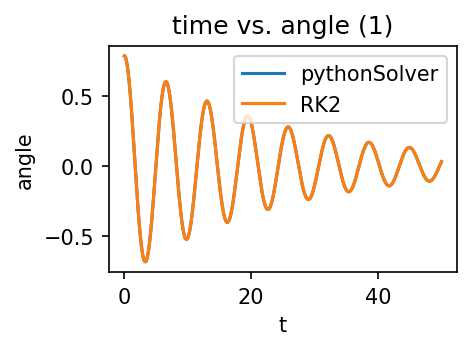

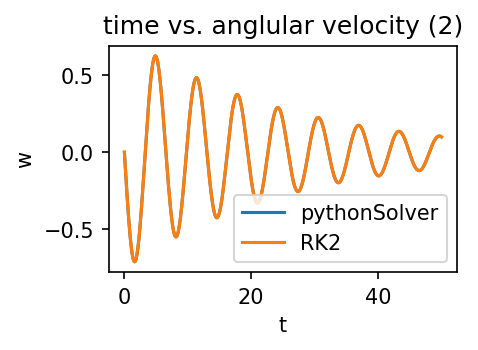

In [10]:
# initializing the time step array 
SimulationTime = 50 # total time of diffeq solver algoritm 
dt = 2.5e-3 # time step of diffeq solver algoritm 
t = np.arange(0,SimulationTime+dt, dt) # array of time steps of the algoritm 

# Pendulum System Variables 
# m - mass 
# l - length
# Θ - angle 
# g - gravity (assumed to be 9.8 m/s^2)
# γ - resitance constant 
# v - velocity 
# A - applied force constant 
# Ω - applied force sin shift 

# γ' - γ/mass*length
# a - A / mass*length^2'
# w - v/l (angular velocity) 

#Initial Conditions
m = 5 
l = 10 
ΘDegrees = 45
γ = 4
v = 0 
A = 2
ΩDegrees = 90
ΩRessonance = np.sqrt(g/l) # test case for omega 
g = 9.8

#Converting to terms of rotation
Θ = ΘDegrees*np.pi/180
Ω = ΩRessonance*np.pi/180
𝜔 = v/l
Θ𝜔 = np.array((Θ,𝜔))
γprime = γ/(m*l)
a = A/(m*(l**2))

#Calling the differential equation solvers 
pythonSolver = odeint(pendulum, Θ𝜔, t, args=(l, γprime, a, Ω, g))
RK2 = RK2SystemArg(pendulum, Θ𝜔, t, args=(l, γprime, a, Ω, g))

#Plotting
plot(t, pythonSolver[:,0], "pythonSolver", t, RK2[:,0], "RK2", "t", "angle", "time vs. angle (1)" )
plot(t, pythonSolver[:,1], "pythonSolver", t, RK2[:,1], "RK2", "t", "w", "time vs. anglular velocity (2)" )

In verifying my solutions I did various things. I started just by testing the pendulums functionallity while there was no friction or applied force. All of these things should happen and did: 
- If we start the pendulum at zero it will stay at zero. 
- If we start the pendulum at 45 degrees it will swing back and forth at that same angle forever.
- Increasing mass doesn't change anything
- Increasing length makes it slower 
    
Now about friction:
- Increasing friction make it converge to 0
    
Now applied force with no friction: 
- When omega is zero, we should have no effect because sin 0 = 0. Also when omega is small we should see the same.
- When we start at 0 degrees and add the external force it will enter sinusodial motion
- When I set omega to root(g/l) the ressonance value i see no effect?

If we have applied force with friction: 
- we can see the case where friction and the applied force work together to slow down the pendulum, then eventually the applied force begins to make the pendulum swing in the other direction
   

# Verification Part 2: Resonance

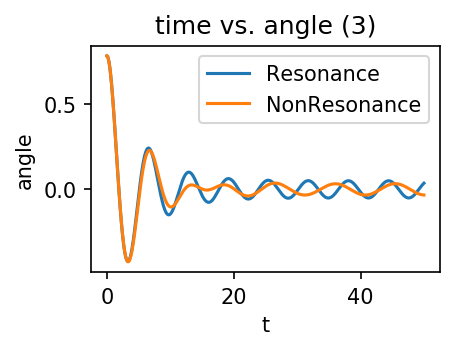

In [11]:
# my goal here is just to verify that at the resonant frequency we see constructive/destructive interference

# initializing the time step array 
SimulationTime = 50 # total time of diffeq solver algoritm 
dt = 2.5e-3 # time step of diffeq solver algoritm 
t = np.arange(0,SimulationTime+dt, dt) # array of time steps of the algoritm 

#Initial Conditions
m = 5 
l = 10 
ΘDegrees = 45
γ = 20
v = 0 
A = -10
ΩResonance = np.sqrt(g/l) # omega is squareroot of g/l this sould cause resonance
ΩNonResonance = 2/3
g = 9.8

#Converting to terms of rotation
Θ = ΘDegrees*np.pi/180
𝜔 = v/l
Θ𝜔 = np.array((Θ,𝜔))
γprime = γ/(m*l)
a = A/(m*(l**2))

#Calling the differential equation solvers 
Resonance = odeint(pendulum, Θ𝜔, t, args=(l, γprime, a, ΩResonance, g))
NonResonance = odeint(pendulum, Θ𝜔, t, args=(l, γprime, a, ΩNonResonance, g))

#Plotting
plot(t, Resonance[:,0], "Resonance", t, NonResonance[:,0], "NonResonance", "t", "angle", "time vs. angle (3)" )

This verification also makes sense. The blue curve of resonance is the case where the applied force lines up with the natural swinging of the pendulum, so it maintains the same cycle length. However, in the orange line, the applied force is not in sync with the natural swining so over time it "takes over" and brings the pendulum to swing in its own frequency. 

# Showing that the system can be PERIODIC

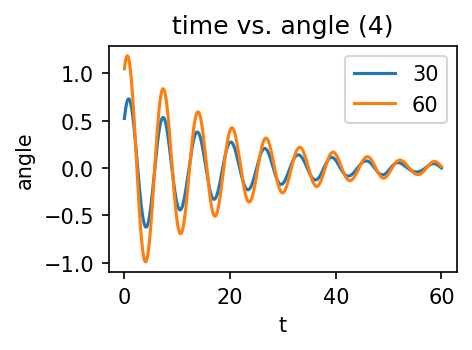

In [12]:
# initializing the time step array 
SimulationTime = 60 # total time of diffeq solver algoritm 
dt = 2.5e-2 # time step of diffeq solver algoritm 
t = np.arange(0,SimulationTime+dt, dt) # array of time steps of the algoritm 

#Initial Conditions
m = 10 
l = 10 
ΘDegrees1 = 30 # NEW
ΘDegrees2 = 60 # NEW
γ = 10 
v = 5 
A = 10
ΩDegrees = 90 # np.sqrt(g/l) # resonance
g = 9.8


#Converting to terms of rotation
Θ1 = ΘDegrees1*np.pi/180 # NEW
Θ2 = ΘDegrees2*np.pi/180 # NEW
Ω = ΩDegrees*np.pi/180
𝜔 = v/l
Θ𝜔1 = np.array((Θ1,𝜔)) # NEW
Θ𝜔2 = np.array((Θ2,𝜔)) # NEW 
γprime = γ/(m*l)
a = A/(m*(l**2))

#Calling the differential equation solvers 
pythonSolver1 = odeint(pendulum, Θ𝜔1, t, args=(l, γprime, a, Ω, g))
pythonSolver2 = odeint(pendulum, Θ𝜔2, t, args=(l, γprime, a, Ω, g))

#Plotting
plot(t, pythonSolver1[:,0], "30", t, pythonSolver2[:,0], "60", "t", "angle", "time vs. angle (4)" )

Even if we start at different angles in this case they will still follow the same path. 

# Showing that the system can be CHAOTIC

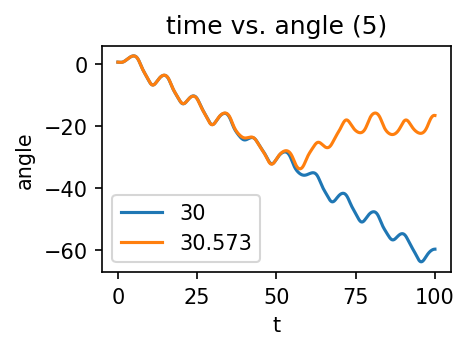

In [23]:
# initializing the time step array 
SimulationTime = 100 # total time of diffeq solver algoritm 
dt = 2.5e-2 # time step of diffeq solver algoritm 
t = np.arange(0,SimulationTime+dt, dt) # array of time steps of the algoritm 

#Initial Conditions
m = 1 
l = 1
ΘDegrees1 = 30 # NEW
ΘDegrees2 = 30.573 # NEW
γ = 0.5
v = 0
A = 1.5
ΩDegrees = 180
Ω = 2/3
g = 1

#Converting to terms of rotation
Θ1 = ΘDegrees1*np.pi/180 # NEW
Θ2 = ΘDegrees2*np.pi/180 # NEW
#Ω = ΩDegrees*np.pi/180
𝜔 = v/l
Θ𝜔1 = np.array((Θ1,𝜔)) # NEW
Θ𝜔2 = np.array((Θ2,𝜔)) # NEW 
γprime = γ/(m*l)
a = A/(m*(l**2))

#Calling the differential equation solvers 
pythonSolver1 = odeint(pendulum, Θ𝜔1, t, args=(l, γprime, a, Ω, g))
pythonSolver2 = odeint(pendulum, Θ𝜔2, t, args=(l, γprime, a, Ω, g))

#Plotting
plot(t, pythonSolver1[:,0], "30", t, pythonSolver2[:,0], "30.573", "t", "angle", "time vs. angle (5)" )

# 3D Solver (Periodic)

Text(0.5, 0.92, 'theta vs. angular velocity vs. force (periodic) (6)')

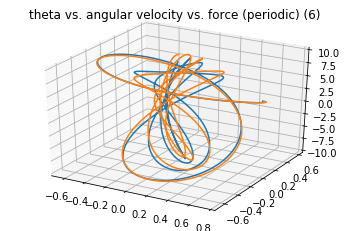

In [14]:
from mpl_toolkits import mplot3d
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# initializing the time step array 
SimulationTime = 50 # total time of diffeq solver algoritm 
dt = 2.5e-2 # time step of diffeq solver algoritm 
t = np.arange(0,SimulationTime+dt, dt) # array of time steps of the algoritm 

#Initial Conditions
m = 10 
l = 10 
ΘDegrees1 = 30 # NEW
ΘDegrees2 = 30.573 # NEW
γ = 10 
v = 5 
A = 10
ΩDegrees = 90 # np.sqrt(g/l) # resonance
g = 9.8

#Converting to terms of rotation
Θ1 = ΘDegrees1*np.pi/180 # NEW
Θ2 = ΘDegrees2*np.pi/180 # NEW
Ω = ΩDegrees*np.pi/180
𝜔 = v/l
Θ𝜔1 = np.array((Θ1,𝜔)) # NEW
Θ𝜔2 = np.array((Θ2,𝜔)) # NEW 
γprime = γ/(m*l)
a = A/(m*(l**2))

#Calling the differential equation solvers 
pythonSolver1 = odeint(pendulum, Θ𝜔1, t, args=(l, γprime, a, Ω, g))
pythonSolver2 = odeint(pendulum, Θ𝜔2, t, args=(l, γprime, a, Ω, g))

#Plotting (solver 1:  30 degrees)
fig = plt.figure()
ax = plt.axes(projection='3d')

x1 = pythonSolver1[:,0] # theta
y1 = pythonSolver1[:,1] # angular velocity
z1 = A*np.sin(Θ1*t) # force
ax.plot3D(x1, y1, z1)

#Plotting (solver 2: 30.573 degrees)
x2 = pythonSolver2[:,0] # theta
y2 = pythonSolver2[:,1] # angular velocity
z2 = A*np.sin(Θ2*t) # force
ax.plot3D(x2, y2, z2)
ax.set_title('theta vs. angular velocity vs. force (periodic) (6)')

# 3D Solver (Chaotic)

Text(0.5, 0.92, 'theta vs. angular velocity vs. force (chaotic) (7)')

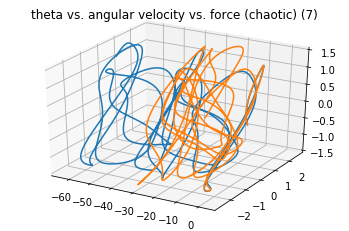

In [15]:
from mpl_toolkits import mplot3d
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# initializing the time step array 
SimulationTime = 100 # total time of diffeq solver algoritm 
dt = 2.5e-2 # time step of diffeq solver algoritm 
t = np.arange(0,SimulationTime+dt, dt) # array of time steps of the algoritm 

#Initial Conditions
m = 1 
l = 1
ΘDegrees1 = 30 # NEW
ΘDegrees2 = 30.573 # NEW
γ = 0.5
v = 0
A = 1.5
ΩDegrees = 180
Ω = 2/3
g = 1

#Converting to terms of rotation
Θ1 = ΘDegrees1*np.pi/180 # NEW
Θ2 = ΘDegrees2*np.pi/180 # NEW
#Ω = ΩDegrees*np.pi/180
𝜔 = v/l
Θ𝜔1 = np.array((Θ1,𝜔)) # NEW
Θ𝜔2 = np.array((Θ2,𝜔)) # NEW 
γprime = γ/(m*l)
a = A/(m*(l**2))

#Calling the differential equation solvers 
pythonSolver1 = odeint(pendulum, Θ𝜔1, t, args=(l, γprime, a, Ω, g))
pythonSolver2 = odeint(pendulum, Θ𝜔2, t, args=(l, γprime, a, Ω, g))

#Plotting (solver 1:  30 degrees)
fig = plt.figure()
ax = plt.axes(projection='3d')

x1 = pythonSolver1[:,0] # theta
y1 = pythonSolver1[:,1] # angular velocity
z1 = A*np.sin(Θ1*t) # force
ax.plot3D(x1, y1, z1)

#Plotting (solver 2: 30.573 degrees)
x2 = pythonSolver2[:,0] # theta
y2 = pythonSolver2[:,1] # angular velocity
z2 = A*np.sin(Θ2*t) # force
ax.plot3D(x2, y2, z2)
ax.set_title('theta vs. angular velocity vs. force (chaotic) (7)')

# R2K and Built In Python Algoritm Will Stay Together For Chaotic Systems

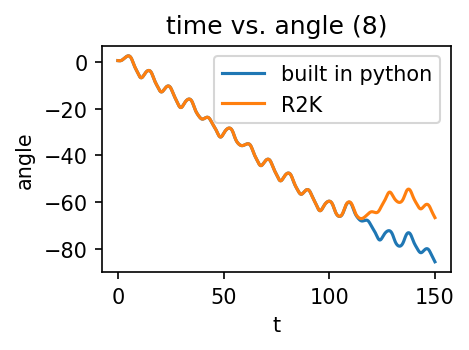

In [21]:
# initializing the time step array 
SimulationTime = 150 # total time of diffeq solver algoritm 
dt = 2.5e-3 # time step of diffeq solver algoritm 
t = np.arange(0,SimulationTime+dt, dt) # array of time steps of the algoritm 

#Initial Conditions
m = 1 
l = 1
ΘDegrees1 = 30 
γ = 0.5
v = 0
A = 1.5
ΩDegrees = 180
Ω = 2/3
g = 1

#Converting to terms of rotation
Θ1 = ΘDegrees1*np.pi/180 
#Ω = ΩDegrees*np.pi/180
𝜔 = v/l
Θ𝜔1 = np.array((Θ1,𝜔))
γprime = γ/(m*l)
a = A/(m*(l**2))

#Calling the differential equation solvers 
pythonSolver = odeint(pendulum, Θ𝜔1, t, args=(l, γprime, a, Ω, g))
R2K = RK2SystemArg(pendulum, Θ𝜔1, t, args=(l, γprime, a, Ω, g))

#Plotting
plot(t, pythonSolver[:,0], "built in python", t, R2K[:,0], "R2K", "t", "angle", "time vs. angle (8)" )

# Discussion 

It is clear from these highlighted examples that for given input values this sytem can act periodically or be chaotic. Below are a few questions highlighting the system and the two integrating algorithms we used to solve them: 

Do R2K and Built in Python Solvers stay consistent?
- No. We can see this in graph #8. At around time interval 75, the two algoritms diverge from eachother. Both had identical starting conditions, and as this is a deterministic model if both algorithms are perfect they should stay on top of eachother. I will note before I continue that decreasing the accuracy of the algoritm by increasing dt will make the two diverge earlier. So the smaller the dt, the more accurate the algoritm will be and the closer they will stay together for longer. This happens because of errors in storing floating point numbers by my computer. As the integrating algoritm continues to find the next and next point in the function there will be some small truncation error as numbers can only be stored to a given accuracy. Over time as this error builds up, because the system is chaotic these erorrs will be amplified.

What can this tell us about these integrating algorithms?
- This means that over time even the python solver will not follow the true solution closely and this euler/runge-kutta method will never be perfect, and infact the further out we predict the more likely we are to be wrong. 

What does it mean for this sytem to be chaotic for ceartain inputs?
- looking at graph #4 we can see that even if we start a stable system with angles 30 degrees apart from one another they will follow the same sin period and approach zero together over time. However in graph number 5 we can see that even if we start the pendulum at two angles very close to one another, but change the inputs so that the system is chaotic, eventually the two pendulum's motion will not resemble eachother at all. Therefore to be chaotic is to have ceartain inputs that cause, over time, the system to be extremely sensitive to the original angle conditions. 
- Also notice in graphs #6 and #7 that for the chaotic system the lines will separate, but in the periodic system they will stay together the whole time. 

Why does the system become chaotic for certain inputs?
- This has to do with 'period doubling'. If we give this function two very simmilar inputs (angles), and if we have the correct paramaters we can see this effect. Essentially at one point the system will switch to a new behavior with double the period. The math is very high level, but its effects are clear to see. 

Why does the system experience resonance at $\Omega = \sqrt{g/l}$ ?
- At this omega value the period of the applied force is some integer multiple of the period of the pendulum. This means that the two will always be 'in sync'. Whether constructive or destructive, or somewhere in between, when we add up two sin waves with the same period we will get standard periodic results. 

# Conclusion

This excercise has taught me that when looking at modeling chaotic systems we have to be very careful about the algoritms that we use to evaluate them. For example if I went through this whole project only using the Runge-Kutta algorithm I would have no idea that it would eventually show the completely wrong result like in graph 8 and I would have no idea. This was also very good practice in using methods to solve complex problems. Without the R2K method or even my own printing helper method that I wrote, this would all have been much more difficult. 